### COVID-19 on ventilator prediction model based on Covid cases and hospitalisation


In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
# Get the curent date/time
today = pd.to_datetime('today')
today

Timestamp('2020-12-11 21:47:28.220853')

In [5]:
# Downloads the lates data availlable and saves it.
# Run this step dayly to update the data.

# df_Covid_data = pd.read_csv('https://covidtracking.com/data/download/national-history.csv')
# df_Covid_data.to_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')

In [6]:
# Loads the last saved data. Make sure the data is up to date by running the cell above. 
df_Covid_data = pd.read_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')
df_Covid_data

,Unnamed: 0,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,0,2020-12-11,287058.0,2749,33237.0,21010.0,5444,108108.0,608998.0,168637806,1449905,3424.0,7489.0,15592946,232105,6135314.0,56,215110717,2094901
1,1,2020-12-10,284309.0,3115,32919.0,21023.0,4335,107258.0,603554.0,167187901,1339749,3394.0,7442.0,15360841,215669,5985047.0,56,213015816,1954686
2,2,2020-12-09,281194.0,3206,32720.0,20906.0,5424,106705.0,599219.0,165848152,1276606,3376.0,7624.0,15145172,211020,5891885.0,56,211061130,1822067
3,3,2020-12-08,277988.0,2661,32406.0,20483.0,4309,104590.0,593795.0,164571546,1192820,3359.0,7245.0,14934152,215335,5788509.0,56,209239063,1628432
4,4,2020-12-07,275327.0,1297,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,3328.0,7073.0,14718817,180219,5714557.0,56,207610631,1772911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,320,2020-01-26,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
321,321,2020-01-25,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
322,322,2020-01-24,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
323,323,2020-01-23,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,1


In [7]:
# Check for shape, null values and data types of the data
print("Size/Shape of the dataset",df_Covid_data.shape)
print("Checking for null values:\n",df_Covid_data.isnull().sum())
print("Checking Data-type:",df_Covid_data.dtypes)

Size/Shape of the dataset (325, 19)
Checking for null values:
 Unnamed: 0                   0
date                         0
death                       19
deathIncrease                0
inIcuCumulative             63
inIcuCurrently              64
hospitalizedIncrease         0
hospitalizedCurrently       55
hospitalizedCumulative      42
negative                     0
negativeIncrease             0
onVentilatorCumulative      70
onVentilatorCurrently       63
positive                     0
positiveIncrease             0
recovered                   63
states                       0
totalTestResults             0
totalTestResultsIncrease     0
dtype: int64
Checking Data-type: Unnamed: 0                    int64
date                         object
death                       float64
deathIncrease                 int64
inIcuCumulative             float64
inIcuCurrently              float64
hospitalizedIncrease          int64
hospitalizedCurrently       float64
hospitalizedCumulative     

In [8]:
# Print the column names
df_Covid_data.columns

Index(['Unnamed: 0', 'date', 'death', 'deathIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'hospitalizedIncrease', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'states', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [9]:
#Drop columns that are not needed for the model
df_Covid_data.drop(['Unnamed: 0','death',\
       'deathIncrease','onVentilatorCumulative','states'],1,inplace = True)

In [10]:
df_Covid_data.columns

Index(['date', 'inIcuCumulative', 'inIcuCurrently', 'hospitalizedIncrease',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'negative',
       'negativeIncrease', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [11]:
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,2020-12-11,33237.0,21010.0,5444,108108.0,608998.0,168637806,1449905,7489.0,15592946,232105,6135314.0,215110717,2094901
1,2020-12-10,32919.0,21023.0,4335,107258.0,603554.0,167187901,1339749,7442.0,15360841,215669,5985047.0,213015816,1954686
2,2020-12-09,32720.0,20906.0,5424,106705.0,599219.0,165848152,1276606,7624.0,15145172,211020,5891885.0,211061130,1822067
3,2020-12-08,32406.0,20483.0,4309,104590.0,593795.0,164571546,1192820,7245.0,14934152,215335,5788509.0,209239063,1628432
4,2020-12-07,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,7073.0,14718817,180219,5714557.0,207610631,1772911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2020-01-26,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
321,2020-01-25,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
322,2020-01-24,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
323,2020-01-23,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,1


In [12]:
# Drop the null rows and sort the data by date
df_Covid_data = df_Covid_data.dropna()
df_Covid_data = df_Covid_data.sort_values(by = "date", ascending = True)
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
260,2020-03-26,91.0,1299.0,2478,7805.0,9551.0,482148,86516,258.0,92976,17734,97.0,643502,108279
259,2020-03-27,124.0,1792.0,2572,10978.0,12123.0,559423,77275,324.0,112220,19244,2418.0,739132,95630
258,2020-03-28,140.0,2174.0,2409,12409.0,14532.0,657185,97762,390.0,131826,19606,3145.0,840610,101478
257,2020-03-29,156.0,2456.0,2794,14055.0,17326.0,722597,65412,439.0,151270,19444,4076.0,919937,79327
256,2020-03-30,187.0,3087.0,2472,15917.0,19798.0,818231,95634,451.0,172740,21470,4560.0,1034163,114226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-12-07,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,7073.0,14718817,180219,5714557.0,207610631,1772911
3,2020-12-08,32406.0,20483.0,4309,104590.0,593795.0,164571546,1192820,7245.0,14934152,215335,5788509.0,209239063,1628432
2,2020-12-09,32720.0,20906.0,5424,106705.0,599219.0,165848152,1276606,7624.0,15145172,211020,5891885.0,211061130,1822067
1,2020-12-10,32919.0,21023.0,4335,107258.0,603554.0,167187901,1339749,7442.0,15360841,215669,5985047.0,213015816,1954686


In [13]:
# Set the date as index
df_Covid_data.set_index('date', inplace =True)
df_Covid_data

,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,
2020-03-26,91.0,1299.0,2478,7805.0,9551.0,482148,86516,258.0,92976,17734,97.0,643502,108279
2020-03-27,124.0,1792.0,2572,10978.0,12123.0,559423,77275,324.0,112220,19244,2418.0,739132,95630
2020-03-28,140.0,2174.0,2409,12409.0,14532.0,657185,97762,390.0,131826,19606,3145.0,840610,101478
2020-03-29,156.0,2456.0,2794,14055.0,17326.0,722597,65412,439.0,151270,19444,4076.0,919937,79327
2020-03-30,187.0,3087.0,2472,15917.0,19798.0,818231,95634,451.0,172740,21470,4560.0,1034163,114226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-07,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,7073.0,14718817,180219,5714557.0,207610631,1772911
2020-12-08,32406.0,20483.0,4309,104590.0,593795.0,164571546,1192820,7245.0,14934152,215335,5788509.0,209239063,1628432
2020-12-09,32720.0,20906.0,5424,106705.0,599219.0,165848152,1276606,7624.0,15145172,211020,5891885.0,211061130,1822067


In [14]:
# Specified data columns to be used in the model 
X = df_Covid_data[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered']]
y = df_Covid_data['onVentilatorCurrently'].values.reshape(-1,1)
y

array([[ 258.],
       [ 324.],
       [ 390.],
       [ 439.],
       [ 451.],
       [ 507.],
       [ 561.],
       [ 574.],
       [ 623.],
       [ 656.],
       [ 652.],
       [2961.],
       [4076.],
       [4131.],
       [5794.],
       [5937.],
       [5978.],
       [5968.],
       [6168.],
       [5975.],
       [6032.],
       [5940.],
       [6096.],
       [5729.],
       [5603.],
       [5567.],
       [5514.],
       [5474.],
       [5464.],
       [5187.],
       [5266.],
       [5121.],
       [4867.],
       [4760.],
       [4796.],
       [4712.],
       [4707.],
       [4845.],
       [4761.],
       [4848.],
       [4818.],
       [4753.],
       [7070.],
       [6788.],
       [6551.],
       [6395.],
       [6350.],
       [6352.],
       [6156.],
       [5940.],
       [5746.],
       [5529.],
       [5467.],
       [5257.],
       [5032.],
       [4911.],
       [4868.],
       [4716.],
       [4620.],
       [4383.],
       [4237.],
       [4215.],
       [

In [15]:

print(X.shape, y.shape)


(261, 5) (261, 1)


## Model - LinearRegression

In [16]:
# Split the data to testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y,)


In [17]:
X_train

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered
date,,,,,
2020-10-07,2140,33584.0,7476473,50588,2997942.0
2020-10-17,1528,37474.0,8028462,57355,3218561.0
2020-08-28,1627,37351.0,5860476,46121,2116889.0
2020-05-15,1313,44551.0,1446350,25422,250665.0
2020-08-13,2651,47322.0,5205005,51621,1773505.0
...,...,...,...,...,...
2020-07-01,1433,36569.0,2674988,51001,822580.0
2020-08-30,662,35801.0,5943723,39285,2152344.0
2020-08-17,1274,43596.0,5397641,37411,1864220.0


In [18]:
# Choose the model
model = LinearRegression()
model

LinearRegression()

In [19]:
# model.fit(X_train, y_train)

In [20]:
# print(f"Training Data Score: {model.score(X_train, y_train)}")
# print(f"Testing Data Score: {model.score(X_test, y_test)}")

In [21]:
# print('Weight coefficients:', model.coef_)
# print('y-axis intercept:', model.intercept_)

### Skaling the data using StandardScaler, and plotting a residual plot


In [22]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [23]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [24]:
# X_train = X_scaler.inverse_transform(X_train_scaled)
# X_train

In [25]:
y_train_scaled.shape

(195, 1)

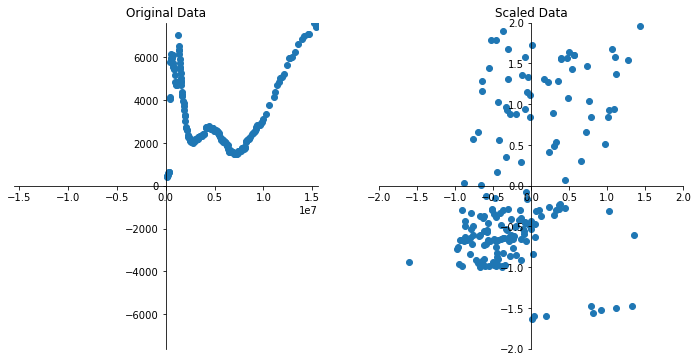

In [26]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["positive"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["positive"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

###  Fit the Model to the scaled training data and make predictions using the scaled test data

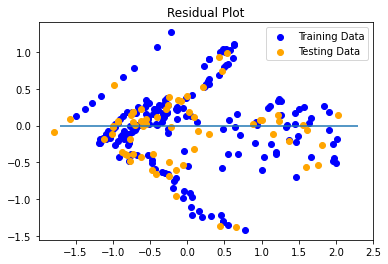

In [27]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [28]:
print(f"Training scaled Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing scaled Data Score: {model.score(X_test_scaled, y_test_scaled)}")
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)


Training scaled Data Score: 0.7259926562252865
Testing scaled Data Score: 0.8012022731094567
Weight coefficients: [[ 0.02023753  1.42399078 -3.41957381 -0.5577957   3.20235188]]
y-axis intercept: [-3.10408421e-17]


## Quantify the model using scaled data

In [29]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.19388111512846545, R2: 0.8012022731094567


In [30]:
X_scaled = X_scaler.transform(X)
predictions = model.predict(X_scaled)
print(f"True output:{y[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(2)-y[0]}") 

True output:[258.]
Predicted output:[105.9]
Prediction Error:[-152.1]


In [31]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)
predicted_y.reshape(1,-1).tolist()[0]


[105.9,
 475.56,
 626.99,
 828.38,
 996.44,
 1209.56,
 1521.98,
 1722.66,
 1979.65,
 2516.65,
 2864.17,
 3280.29,
 4212.59,
 4414.06,
 5047.09,
 5307.43,
 5612.46,
 5619.26,
 5784.35,
 6145.62,
 6085.87,
 5958.29,
 5839.52,
 5769.94,
 5559.74,
 5585.23,
 5964.42,
 5862.84,
 5765.13,
 5429.0,
 5379.3,
 5366.26,
 5444.42,
 5386.61,
 5368.18,
 5119.59,
 5169.57,
 4986.39,
 4848.0,
 4866.27,
 4949.28,
 4782.11,
 4598.03,
 4387.72,
 4195.73,
 4013.48,
 4074.06,
 4083.72,
 4034.02,
 3792.08,
 3579.41,
 3512.39,
 3355.67,
 3334.46,
 3344.58,
 3304.64,
 3146.43,
 3156.21,
 2961.83,
 2907.34,
 2920.56,
 3248.74,
 2979.16,
 3144.67,
 2971.36,
 2810.48,
 2799.45,
 2792.78,
 2717.02,
 2652.67,
 2513.96,
 2483.7,
 2414.76,
 2408.27,
 2415.9,
 2425.7,
 2318.88,
 2152.17,
 2048.26,
 1893.28,
 1878.18,
 1957.04,
 1908.83,
 1924.76,
 1833.53,
 1766.09,
 1635.72,
 1699.12,
 1844.0,
 1879.33,
 1860.77,
 1904.75,
 1755.31,
 1840.14,
 1820.29,
 2019.4,
 2064.23,
 2112.03,
 2305.93,
 2282.33,
 2264.88,
 247

In [32]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)

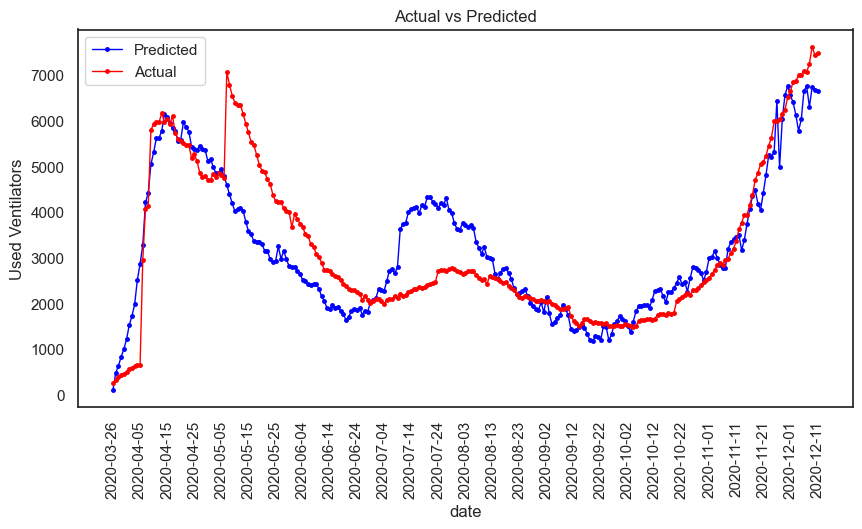

In [33]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data.index, df_Covid_data['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

# Model 2 Random Forest Regressor

In [34]:
## Model 2
#Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [35]:
y_train_scaled_1d = y_train_scaled .ravel()
y_test_scaled_1d = y_test_scaled .ravel()

In [36]:
rg = RandomForestRegressor(n_estimators=40)
rg.fit(X_train_scaled, y_train_scaled_1d)

RandomForestRegressor(n_estimators=40)

In [37]:
print(f"Training scaled Data Score: {rg.score(X_train_scaled, y_train_scaled)}")
print(f"Testing scaled Data Score: {rg.score(X_test_scaled, y_test_scaled)}")

Training scaled Data Score: 0.995512234437085
Testing scaled Data Score: 0.9634223510220403


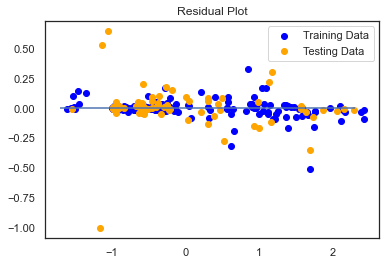

In [38]:
# Build residual plot
plt.scatter(rg.predict(X_train_scaled), rg.predict(X_train_scaled) - y_train_scaled_1d, c="blue", label="Training Data")
plt.scatter(rg.predict(X_test_scaled), rg.predict(X_test_scaled) - y_test_scaled_1d, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled_1d.min(), xmax=y_test_scaled_1d.max())
plt.title("Residual Plot")
plt.show()

In [39]:
predictions_rg = rg.predict(X_scaled)
print(f"True output:{y}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions_rg).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions_rg).round(2)-y}") 

True output:[[ 258.]
 [ 324.]
 [ 390.]
 [ 439.]
 [ 451.]
 [ 507.]
 [ 561.]
 [ 574.]
 [ 623.]
 [ 656.]
 [ 652.]
 [2961.]
 [4076.]
 [4131.]
 [5794.]
 [5937.]
 [5978.]
 [5968.]
 [6168.]
 [5975.]
 [6032.]
 [5940.]
 [6096.]
 [5729.]
 [5603.]
 [5567.]
 [5514.]
 [5474.]
 [5464.]
 [5187.]
 [5266.]
 [5121.]
 [4867.]
 [4760.]
 [4796.]
 [4712.]
 [4707.]
 [4845.]
 [4761.]
 [4848.]
 [4818.]
 [4753.]
 [7070.]
 [6788.]
 [6551.]
 [6395.]
 [6350.]
 [6352.]
 [6156.]
 [5940.]
 [5746.]
 [5529.]
 [5467.]
 [5257.]
 [5032.]
 [4911.]
 [4868.]
 [4716.]
 [4620.]
 [4383.]
 [4237.]
 [4215.]
 [4222.]
 [4080.]
 [4032.]
 [4004.]
 [3669.]
 [3950.]
 [3852.]
 [3749.]
 [3665.]
 [3523.]
 [3476.]
 [3298.]
 [3240.]
 [3090.]
 [3020.]
 [2886.]
 [2734.]
 [2726.]
 [2716.]
 [2640.]
 [2594.]
 [2588.]
 [2520.]
 [2434.]
 [2380.]
 [2321.]
 [2299.]
 [2293.]
 [2248.]
 [2214.]
 [2075.]
 [2159.]
 [2077.]
 [2011.]
 [2044.]
 [2098.]
 [2105.]
 [2049.]
 [1982.]
 [2080.]
 [2105.]
 [2098.]
 [2172.]
 [2127.]
 [2197.]
 [2169.]
 [2182.]
 [2259.

In [40]:
predicted_y_rg = y_scaler.inverse_transform(predictions_rg).round(2)

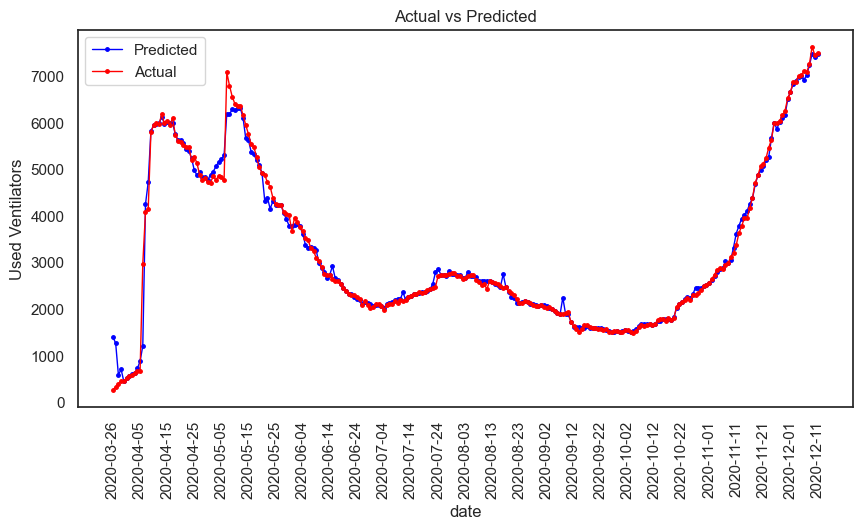

In [41]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data.index, predicted_y_rg, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data.index, df_Covid_data['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

### The random forest regresor scored great with R2 of 0.99, however the random forest regressor is unable to discover trends that would enable it in extrapolating values that fall outside the training set. Having in mind that the currnet covid cases are raising and we are seeing new high every day, this  model willl be abandoned.

#### For more info see https://neptune.ai/blog/random-forest-regression-when-does-it-fail-and-why

## Model 3, Linear regression with more data columns added


In [42]:
df_Covid_data_Offset = df_Covid_data[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered','onVentilatorCurrently']]
df_Covid_data_Offset

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently
date,,,,,,
2020-03-26,2478,7805.0,92976,17734,97.0,258.0
2020-03-27,2572,10978.0,112220,19244,2418.0,324.0
2020-03-28,2409,12409.0,131826,19606,3145.0,390.0
2020-03-29,2794,14055.0,151270,19444,4076.0,439.0
2020-03-30,2472,15917.0,172740,21470,4560.0,451.0
...,...,...,...,...,...,...
2020-12-07,3614,102148.0,14718817,180219,5714557.0,7073.0
2020-12-08,4309,104590.0,14934152,215335,5788509.0,7245.0
2020-12-09,5424,106705.0,15145172,211020,5891885.0,7624.0


In [43]:
# Function for shifting row values
def add_data_shift (data_frame, column_name, x):
    for i in x:
        shift_i = column_name + '_shifted_'+str(i)
        data_frame[shift_i] = data_frame[column_name]
        data_frame[shift_i] = data_frame[shift_i].shift(0-i)
    return(data_frame)

In [44]:
add_data_shift (df_Covid_data_Offset, "positive", [1,3,7,10])

C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10
date,,,,,,,,,,
2020-03-26,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0
2020-03-27,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0
2020-03-28,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0
2020-03-29,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0
2020-03-30,2472,15917.0,172740,21470,4560.0,451.0,197924.0,252085.0,370872.0,467580.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-07,3614,102148.0,14718817,180219,5714557.0,7073.0,14934152.0,15360841.0,NaN,NaN
2020-12-08,4309,104590.0,14934152,215335,5788509.0,7245.0,15145172.0,15592946.0,NaN,NaN
2020-12-09,5424,106705.0,15145172,211020,5891885.0,7624.0,15360841.0,NaN,NaN,NaN


In [45]:
add_data_shift (df_Covid_data_Offset, "hospitalizedCurrently", [1,3,7,10])

C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10,hospitalizedCurrently_shifted_1,hospitalizedCurrently_shifted_3,hospitalizedCurrently_shifted_7,hospitalizedCurrently_shifted_10
date,,,,,,,,,,,,,,
2020-03-26,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0,10978.0,14055.0,22997.0,32180.0
2020-03-27,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0,12409.0,15917.0,25777.0,36159.0
2020-03-28,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0,14055.0,18155.0,30268.0,43849.0
2020-03-29,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0,15917.0,20906.0,32180.0,45515.0
2020-03-30,2472,15917.0,172740,21470,4560.0,451.0,197924.0,252085.0,370872.0,467580.0,18155.0,22997.0,36159.0,51313.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-07,3614,102148.0,14718817,180219,5714557.0,7073.0,14934152.0,15360841.0,NaN,NaN,104590.0,107258.0,NaN,NaN
2020-12-08,4309,104590.0,14934152,215335,5788509.0,7245.0,15145172.0,15592946.0,NaN,NaN,106705.0,108108.0,NaN,NaN
2020-12-09,5424,106705.0,15145172,211020,5891885.0,7624.0,15360841.0,NaN,NaN,NaN,107258.0,NaN,NaN,NaN


In [46]:
add_data_shift (df_Covid_data_Offset, "recovered", [1,3,7,10])

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10,hospitalizedCurrently_shifted_1,hospitalizedCurrently_shifted_3,hospitalizedCurrently_shifted_7,hospitalizedCurrently_shifted_10,recovered_shifted_1,recovered_shifted_3,recovered_shifted_7,recovered_shifted_10
date,,,,,,,,,,,,,,,,,,
2020-03-26,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0,10978.0,14055.0,22997.0,32180.0,2418.0,4076.0,8586.0,14589.0
2020-03-27,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0,12409.0,15917.0,25777.0,36159.0,3145.0,4560.0,10861.0,16557.0
2020-03-28,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0,14055.0,18155.0,30268.0,43849.0,4076.0,5666.0,12844.0,18481.0
2020-03-29,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0,15917.0,20906.0,32180.0,45515.0,4560.0,7084.0,14589.0,21132.0
2020-03-30,2472,15917.0,172740,21470,4560.0,451.0,197924.0,252085.0,370872.0,467580.0,18155.0,22997.0,36159.0,51313.0,5666.0,8586.0,16557.0,24835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-07,3614,102148.0,14718817,180219,5714557.0,7073.0,14934152.0,15360841.0,NaN,NaN,104590.0,107258.0,NaN,NaN,5788509.0,5985047.0,NaN,NaN
2020-12-08,4309,104590.0,14934152,215335,5788509.0,7245.0,15145172.0,15592946.0,NaN,NaN,106705.0,108108.0,NaN,NaN,5891885.0,6135314.0,NaN,NaN
2020-12-09,5424,106705.0,15145172,211020,5891885.0,7624.0,15360841.0,NaN,NaN,NaN,107258.0,NaN,NaN,NaN,5985047.0,NaN,NaN,NaN


In [48]:
# df_Covid_data_Offset.to_csv('National_Covid_Data_Offset_'+today.strftime("%Y-%m-%d")+'.csv')

In [49]:
df_Covid_data_Offset = df_Covid_data_Offset.dropna()

In [50]:
print("Size/Shape of the dataset",df_Covid_data_Offset.shape)
print("Checking for null values:\n",df_Covid_data_Offset.isnull().sum())
print("Checking Data-type:",df_Covid_data_Offset.dtypes)

Size/Shape of the dataset (251, 18)
Checking for null values:
 hospitalizedIncrease                0
hospitalizedCurrently               0
positive                            0
positiveIncrease                    0
recovered                           0
onVentilatorCurrently               0
positive_shifted_1                  0
positive_shifted_3                  0
positive_shifted_7                  0
positive_shifted_10                 0
hospitalizedCurrently_shifted_1     0
hospitalizedCurrently_shifted_3     0
hospitalizedCurrently_shifted_7     0
hospitalizedCurrently_shifted_10    0
recovered_shifted_1                 0
recovered_shifted_3                 0
recovered_shifted_7                 0
recovered_shifted_10                0
dtype: int64
Checking Data-type: hospitalizedIncrease                  int64
hospitalizedCurrently               float64
positive                              int64
positiveIncrease                      int64
recovered                           float64


In [51]:
X = df_Covid_data_Offset[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered',"positive_shifted_1", "positive_shifted_3","positive_shifted_7","positive_shifted_10",\
                  "hospitalizedCurrently_shifted_1","hospitalizedCurrently_shifted_3","hospitalizedCurrently_shifted_7","hospitalizedCurrently_shifted_10",\
                  "recovered_shifted_1", "recovered_shifted_3","recovered_shifted_7","recovered_shifted_10"]]
y = df_Covid_data_Offset['onVentilatorCurrently'].values.reshape(-1,1)


In [52]:
# From this step on, the same process is followed

In [53]:
print(X.shape, y.shape)

(251, 17) (251, 1)


In [54]:
# Split the data to testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y,)

In [55]:
# Choose the model
model = LinearRegression()
model

LinearRegression()

In [56]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

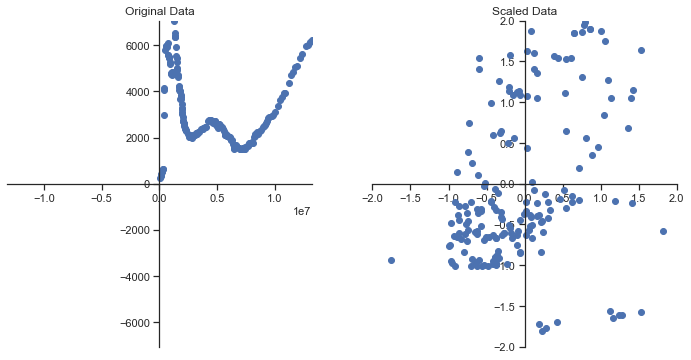

In [57]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["positive"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["positive"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [58]:
X.dtypes

hospitalizedIncrease                  int64
hospitalizedCurrently               float64
positive                              int64
positiveIncrease                      int64
recovered                           float64
positive_shifted_1                  float64
positive_shifted_3                  float64
positive_shifted_7                  float64
positive_shifted_10                 float64
hospitalizedCurrently_shifted_1     float64
hospitalizedCurrently_shifted_3     float64
hospitalizedCurrently_shifted_7     float64
hospitalizedCurrently_shifted_10    float64
recovered_shifted_1                 float64
recovered_shifted_3                 float64
recovered_shifted_7                 float64
recovered_shifted_10                float64
dtype: object

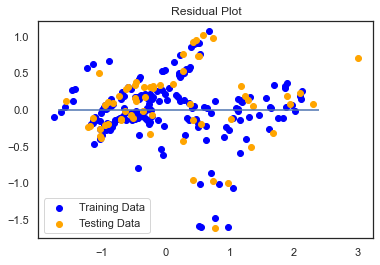

In [59]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [60]:
print(f"Training scaled Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing scaled Data Score: {model.score(X_test_scaled, y_test_scaled)}")
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)

Training scaled Data Score: 0.8360058664055934
Testing scaled Data Score: 0.7971528246223771
Weight coefficients: [[-1.62542304e-02  1.80238635e+00 -2.11826957e+00  2.04094340e-02
   7.27204432e+00  1.28181243e+01 -2.20034313e+01 -1.11058017e+01
   1.13859167e+01 -1.62808388e-01  4.67830501e-01 -7.84812258e-01
  -5.82679316e-01 -3.10105227e+00 -9.77566737e+00  4.88770073e-01
   1.57647973e+01]]
y-axis intercept: [-5.98211141e-17]


In [61]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.23268799909099214, R2: 0.7971528246223771


In [62]:
X_scaled = X_scaler.transform(X)
predictions = model.predict(X_scaled)
print(f"True output:{y[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(2)-y[0]}") 

True output:[258.]
Predicted output:[1143.84]
Prediction Error:[885.84]


In [63]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)

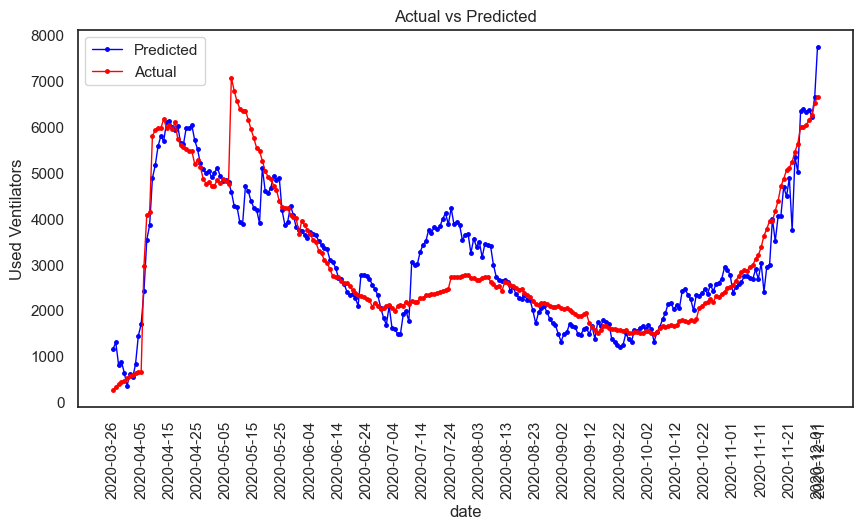

In [64]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data_Offset.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data_Offset.index, df_Covid_data_Offset['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

### Model 4 Neural Network Model

In [66]:
# pip install Keras, if needed and not installed before

In [67]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [68]:
# # define base model
# def baseline_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(17, input_dim=17, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(8, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal'))
#     # Compile model
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model
# # evaluate model
# estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
# kfold = KFold(n_splits=10)
# results = cross_val_score(estimator, X_train_scaled, y_train_scaled, cv=kfold)
# print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [69]:
# # define wider model
# def wider_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(17, input_dim=17, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal'))
#     # Compile model
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model
# # evaluate model with standardized dataset
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
# pipeline = Pipeline(estimators)
# kfold = KFold(n_splits=10)
# results = cross_val_score(pipeline, X, y, cv=kfold)
# print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [70]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=17, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [121]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=3000,
    shuffle=False,
    verbose=2
)

Epoch 1/3000
6/6 - 0s - loss: 0.9869
Epoch 2/3000
6/6 - 0s - loss: 0.9779
Epoch 3/3000
6/6 - 0s - loss: 0.9678
Epoch 4/3000
6/6 - 0s - loss: 0.9553
Epoch 5/3000
6/6 - 0s - loss: 0.9397
Epoch 6/3000
6/6 - 0s - loss: 0.9202
Epoch 7/3000
6/6 - 0s - loss: 0.8958
Epoch 8/3000
6/6 - 0s - loss: 0.8663
Epoch 9/3000
6/6 - 0s - loss: 0.8315
Epoch 10/3000
6/6 - 0s - loss: 0.7917
Epoch 11/3000
6/6 - 0s - loss: 0.7480
Epoch 12/3000
6/6 - 0s - loss: 0.7019
Epoch 13/3000
6/6 - 0s - loss: 0.6548
Epoch 14/3000
6/6 - 0s - loss: 0.6081
Epoch 15/3000
6/6 - 0s - loss: 0.5624
Epoch 16/3000
6/6 - 0s - loss: 0.5177
Epoch 17/3000
6/6 - 0s - loss: 0.4752
Epoch 18/3000
6/6 - 0s - loss: 0.4348
Epoch 19/3000
6/6 - 0s - loss: 0.3969
Epoch 20/3000
6/6 - 0s - loss: 0.3619
Epoch 21/3000
6/6 - 0s - loss: 0.3295
Epoch 22/3000
6/6 - 0s - loss: 0.3003
Epoch 23/3000
6/6 - 0s - loss: 0.2740
Epoch 24/3000
6/6 - 0s - loss: 0.2505
Epoch 25/3000
6/6 - 0s - loss: 0.2294
Epoch 26/3000
6/6 - 0s - loss: 0.2099
Epoch 27/3000
6/6 - 0

Epoch 214/3000
6/6 - 0s - loss: 0.0211
Epoch 215/3000
6/6 - 0s - loss: 0.0210
Epoch 216/3000
6/6 - 0s - loss: 0.0210
Epoch 217/3000
6/6 - 0s - loss: 0.0209
Epoch 218/3000
6/6 - 0s - loss: 0.0209
Epoch 219/3000
6/6 - 0s - loss: 0.0208
Epoch 220/3000
6/6 - 0s - loss: 0.0208
Epoch 221/3000
6/6 - 0s - loss: 0.0208
Epoch 222/3000
6/6 - 0s - loss: 0.0208
Epoch 223/3000
6/6 - 0s - loss: 0.0207
Epoch 224/3000
6/6 - 0s - loss: 0.0207
Epoch 225/3000
6/6 - 0s - loss: 0.0206
Epoch 226/3000
6/6 - 0s - loss: 0.0206
Epoch 227/3000
6/6 - 0s - loss: 0.0205
Epoch 228/3000
6/6 - 0s - loss: 0.0205
Epoch 229/3000
6/6 - 0s - loss: 0.0205
Epoch 230/3000
6/6 - 0s - loss: 0.0205
Epoch 231/3000
6/6 - 0s - loss: 0.0204
Epoch 232/3000
6/6 - 0s - loss: 0.0204
Epoch 233/3000
6/6 - 0s - loss: 0.0203
Epoch 234/3000
6/6 - 0s - loss: 0.0203
Epoch 235/3000
6/6 - 0s - loss: 0.0203
Epoch 236/3000
6/6 - 0s - loss: 0.0202
Epoch 237/3000
6/6 - 0s - loss: 0.0202
Epoch 238/3000
6/6 - 0s - loss: 0.0202
Epoch 239/3000
6/6 - 0s -

Epoch 425/3000
6/6 - 0s - loss: 0.0121
Epoch 426/3000
6/6 - 0s - loss: 0.0121
Epoch 427/3000
6/6 - 0s - loss: 0.0121
Epoch 428/3000
6/6 - 0s - loss: 0.0120
Epoch 429/3000
6/6 - 0s - loss: 0.0120
Epoch 430/3000
6/6 - 0s - loss: 0.0120
Epoch 431/3000
6/6 - 0s - loss: 0.0119
Epoch 432/3000
6/6 - 0s - loss: 0.0119
Epoch 433/3000
6/6 - 0s - loss: 0.0118
Epoch 434/3000
6/6 - 0s - loss: 0.0118
Epoch 435/3000
6/6 - 0s - loss: 0.0118
Epoch 436/3000
6/6 - 0s - loss: 0.0117
Epoch 437/3000
6/6 - 0s - loss: 0.0116
Epoch 438/3000
6/6 - 0s - loss: 0.0116
Epoch 439/3000
6/6 - 0s - loss: 0.0116
Epoch 440/3000
6/6 - 0s - loss: 0.0116
Epoch 441/3000
6/6 - 0s - loss: 0.0115
Epoch 442/3000
6/6 - 0s - loss: 0.0115
Epoch 443/3000
6/6 - 0s - loss: 0.0114
Epoch 444/3000
6/6 - 0s - loss: 0.0114
Epoch 445/3000
6/6 - 0s - loss: 0.0113
Epoch 446/3000
6/6 - 0s - loss: 0.0113
Epoch 447/3000
6/6 - 0s - loss: 0.0113
Epoch 448/3000
6/6 - 0s - loss: 0.0112
Epoch 449/3000
6/6 - 0s - loss: 0.0112
Epoch 450/3000
6/6 - 0s -

Epoch 636/3000
6/6 - 0s - loss: 0.0051
Epoch 637/3000
6/6 - 0s - loss: 0.0051
Epoch 638/3000
6/6 - 0s - loss: 0.0048
Epoch 639/3000
6/6 - 0s - loss: 0.0049
Epoch 640/3000
6/6 - 0s - loss: 0.0051
Epoch 641/3000
6/6 - 0s - loss: 0.0048
Epoch 642/3000
6/6 - 0s - loss: 0.0047
Epoch 643/3000
6/6 - 0s - loss: 0.0050
Epoch 644/3000
6/6 - 0s - loss: 0.0049
Epoch 645/3000
6/6 - 0s - loss: 0.0047
Epoch 646/3000
6/6 - 0s - loss: 0.0048
Epoch 647/3000
6/6 - 0s - loss: 0.0050
Epoch 648/3000
6/6 - 0s - loss: 0.0048
Epoch 649/3000
6/6 - 0s - loss: 0.0046
Epoch 650/3000
6/6 - 0s - loss: 0.0050
Epoch 651/3000
6/6 - 0s - loss: 0.0048
Epoch 652/3000
6/6 - 0s - loss: 0.0046
Epoch 653/3000
6/6 - 0s - loss: 0.0049
Epoch 654/3000
6/6 - 0s - loss: 0.0049
Epoch 655/3000
6/6 - 0s - loss: 0.0046
Epoch 656/3000
6/6 - 0s - loss: 0.0046
Epoch 657/3000
6/6 - 0s - loss: 0.0049
Epoch 658/3000
6/6 - 0s - loss: 0.0046
Epoch 659/3000
6/6 - 0s - loss: 0.0044
Epoch 660/3000
6/6 - 0s - loss: 0.0047
Epoch 661/3000
6/6 - 0s -

Epoch 847/3000
6/6 - 0s - loss: 0.0033
Epoch 848/3000
6/6 - 0s - loss: 0.0030
Epoch 849/3000
6/6 - 0s - loss: 0.0028
Epoch 850/3000
6/6 - 0s - loss: 0.0032
Epoch 851/3000
6/6 - 0s - loss: 0.0033
Epoch 852/3000
6/6 - 0s - loss: 0.0031
Epoch 853/3000
6/6 - 0s - loss: 0.0028
Epoch 854/3000
6/6 - 0s - loss: 0.0035
Epoch 855/3000
6/6 - 0s - loss: 0.0032
Epoch 856/3000
6/6 - 0s - loss: 0.0031
Epoch 857/3000
6/6 - 0s - loss: 0.0028
Epoch 858/3000
6/6 - 0s - loss: 0.0035
Epoch 859/3000
6/6 - 0s - loss: 0.0031
Epoch 860/3000
6/6 - 0s - loss: 0.0030
Epoch 861/3000
6/6 - 0s - loss: 0.0028
Epoch 862/3000
6/6 - 0s - loss: 0.0033
Epoch 863/3000
6/6 - 0s - loss: 0.0030
Epoch 864/3000
6/6 - 0s - loss: 0.0029
Epoch 865/3000
6/6 - 0s - loss: 0.0028
Epoch 866/3000
6/6 - 0s - loss: 0.0033
Epoch 867/3000
6/6 - 0s - loss: 0.0029
Epoch 868/3000
6/6 - 0s - loss: 0.0028
Epoch 869/3000
6/6 - 0s - loss: 0.0029
Epoch 870/3000
6/6 - 0s - loss: 0.0032
Epoch 871/3000
6/6 - 0s - loss: 0.0029
Epoch 872/3000
6/6 - 0s -

Epoch 1056/3000
6/6 - 0s - loss: 0.0026
Epoch 1057/3000
6/6 - 0s - loss: 0.0024
Epoch 1058/3000
6/6 - 0s - loss: 0.0022
Epoch 1059/3000
6/6 - 0s - loss: 0.0028
Epoch 1060/3000
6/6 - 0s - loss: 0.0026
Epoch 1061/3000
6/6 - 0s - loss: 0.0025
Epoch 1062/3000
6/6 - 0s - loss: 0.0023
Epoch 1063/3000
6/6 - 0s - loss: 0.0027
Epoch 1064/3000
6/6 - 0s - loss: 0.0026
Epoch 1065/3000
6/6 - 0s - loss: 0.0024
Epoch 1066/3000
6/6 - 0s - loss: 0.0022
Epoch 1067/3000
6/6 - 0s - loss: 0.0028
Epoch 1068/3000
6/6 - 0s - loss: 0.0026
Epoch 1069/3000
6/6 - 0s - loss: 0.0025
Epoch 1070/3000
6/6 - 0s - loss: 0.0022
Epoch 1071/3000
6/6 - 0s - loss: 0.0028
Epoch 1072/3000
6/6 - 0s - loss: 0.0026
Epoch 1073/3000
6/6 - 0s - loss: 0.0024
Epoch 1074/3000
6/6 - 0s - loss: 0.0022
Epoch 1075/3000
6/6 - 0s - loss: 0.0027
Epoch 1076/3000
6/6 - 0s - loss: 0.0025
Epoch 1077/3000
6/6 - 0s - loss: 0.0024
Epoch 1078/3000
6/6 - 0s - loss: 0.0023
Epoch 1079/3000
6/6 - 0s - loss: 0.0028
Epoch 1080/3000
6/6 - 0s - loss: 0.0025


Epoch 1261/3000
6/6 - 0s - loss: 0.0021
Epoch 1262/3000
6/6 - 0s - loss: 0.0020
Epoch 1263/3000
6/6 - 0s - loss: 0.0022
Epoch 1264/3000
6/6 - 0s - loss: 0.0023
Epoch 1265/3000
6/6 - 0s - loss: 0.0021
Epoch 1266/3000
6/6 - 0s - loss: 0.0020
Epoch 1267/3000
6/6 - 0s - loss: 0.0022
Epoch 1268/3000
6/6 - 0s - loss: 0.0024
Epoch 1269/3000
6/6 - 0s - loss: 0.0022
Epoch 1270/3000
6/6 - 0s - loss: 0.0020
Epoch 1271/3000
6/6 - 0s - loss: 0.0022
Epoch 1272/3000
6/6 - 0s - loss: 0.0024
Epoch 1273/3000
6/6 - 0s - loss: 0.0022
Epoch 1274/3000
6/6 - 0s - loss: 0.0020
Epoch 1275/3000
6/6 - 0s - loss: 0.0022
Epoch 1276/3000
6/6 - 0s - loss: 0.0024
Epoch 1277/3000
6/6 - 0s - loss: 0.0022
Epoch 1278/3000
6/6 - 0s - loss: 0.0020
Epoch 1279/3000
6/6 - 0s - loss: 0.0022
Epoch 1280/3000
6/6 - 0s - loss: 0.0024
Epoch 1281/3000
6/6 - 0s - loss: 0.0022
Epoch 1282/3000
6/6 - 0s - loss: 0.0020
Epoch 1283/3000
6/6 - 0s - loss: 0.0022
Epoch 1284/3000
6/6 - 0s - loss: 0.0026
Epoch 1285/3000
6/6 - 0s - loss: 0.0022


Epoch 1466/3000
6/6 - 0s - loss: 0.0018
Epoch 1467/3000
6/6 - 0s - loss: 0.0016
Epoch 1468/3000
6/6 - 0s - loss: 0.0016
Epoch 1469/3000
6/6 - 0s - loss: 0.0016
Epoch 1470/3000
6/6 - 0s - loss: 0.0019
Epoch 1471/3000
6/6 - 0s - loss: 0.0017
Epoch 1472/3000
6/6 - 0s - loss: 0.0017
Epoch 1473/3000
6/6 - 0s - loss: 0.0016
Epoch 1474/3000
6/6 - 0s - loss: 0.0019
Epoch 1475/3000
6/6 - 0s - loss: 0.0018
Epoch 1476/3000
6/6 - 0s - loss: 0.0017
Epoch 1477/3000
6/6 - 0s - loss: 0.0016
Epoch 1478/3000
6/6 - 0s - loss: 0.0018
Epoch 1479/3000
6/6 - 0s - loss: 0.0020
Epoch 1480/3000
6/6 - 0s - loss: 0.0017
Epoch 1481/3000
6/6 - 0s - loss: 0.0017
Epoch 1482/3000
6/6 - 0s - loss: 0.0017
Epoch 1483/3000
6/6 - 0s - loss: 0.0021
Epoch 1484/3000
6/6 - 0s - loss: 0.0018
Epoch 1485/3000
6/6 - 0s - loss: 0.0018
Epoch 1486/3000
6/6 - 0s - loss: 0.0016
Epoch 1487/3000
6/6 - 0s - loss: 0.0022
Epoch 1488/3000
6/6 - 0s - loss: 0.0020
Epoch 1489/3000
6/6 - 0s - loss: 0.0018
Epoch 1490/3000
6/6 - 0s - loss: 0.0016


Epoch 1671/3000
6/6 - 0s - loss: 0.0016
Epoch 1672/3000
6/6 - 0s - loss: 0.0016
Epoch 1673/3000
6/6 - 0s - loss: 0.0015
Epoch 1674/3000
6/6 - 0s - loss: 0.0018
Epoch 1675/3000
6/6 - 0s - loss: 0.0017
Epoch 1676/3000
6/6 - 0s - loss: 0.0016
Epoch 1677/3000
6/6 - 0s - loss: 0.0015
Epoch 1678/3000
6/6 - 0s - loss: 0.0016
Epoch 1679/3000
6/6 - 0s - loss: 0.0018
Epoch 1680/3000
6/6 - 0s - loss: 0.0016
Epoch 1681/3000
6/6 - 0s - loss: 0.0016
Epoch 1682/3000
6/6 - 0s - loss: 0.0015
Epoch 1683/3000
6/6 - 0s - loss: 0.0019
Epoch 1684/3000
6/6 - 0s - loss: 0.0017
Epoch 1685/3000
6/6 - 0s - loss: 0.0016
Epoch 1686/3000
6/6 - 0s - loss: 0.0015
Epoch 1687/3000
6/6 - 0s - loss: 0.0018
Epoch 1688/3000
6/6 - 0s - loss: 0.0019
Epoch 1689/3000
6/6 - 0s - loss: 0.0016
Epoch 1690/3000
6/6 - 0s - loss: 0.0016
Epoch 1691/3000
6/6 - 0s - loss: 0.0016
Epoch 1692/3000
6/6 - 0s - loss: 0.0020
Epoch 1693/3000
6/6 - 0s - loss: 0.0017
Epoch 1694/3000
6/6 - 0s - loss: 0.0017
Epoch 1695/3000
6/6 - 0s - loss: 0.0015


Epoch 1876/3000
6/6 - 0s - loss: 0.0017
Epoch 1877/3000
6/6 - 0s - loss: 0.0016
Epoch 1878/3000
6/6 - 0s - loss: 0.0017
Epoch 1879/3000
6/6 - 0s - loss: 0.0022
Epoch 1880/3000
6/6 - 0s - loss: 0.0017
Epoch 1881/3000
6/6 - 0s - loss: 0.0018
Epoch 1882/3000
6/6 - 0s - loss: 0.0015
Epoch 1883/3000
6/6 - 0s - loss: 0.0022
Epoch 1884/3000
6/6 - 0s - loss: 0.0018
Epoch 1885/3000
6/6 - 0s - loss: 0.0018
Epoch 1886/3000
6/6 - 0s - loss: 0.0015
Epoch 1887/3000
6/6 - 0s - loss: 0.0020
Epoch 1888/3000
6/6 - 0s - loss: 0.0019
Epoch 1889/3000
6/6 - 0s - loss: 0.0017
Epoch 1890/3000
6/6 - 0s - loss: 0.0015
Epoch 1891/3000
6/6 - 0s - loss: 0.0017
Epoch 1892/3000
6/6 - 0s - loss: 0.0019
Epoch 1893/3000
6/6 - 0s - loss: 0.0016
Epoch 1894/3000
6/6 - 0s - loss: 0.0015
Epoch 1895/3000
6/6 - 0s - loss: 0.0014
Epoch 1896/3000
6/6 - 0s - loss: 0.0018
Epoch 1897/3000
6/6 - 0s - loss: 0.0015
Epoch 1898/3000
6/6 - 0s - loss: 0.0015
Epoch 1899/3000
6/6 - 0s - loss: 0.0014
Epoch 1900/3000
6/6 - 0s - loss: 0.0018


Epoch 2081/3000
6/6 - 0s - loss: 0.0018
Epoch 2082/3000
6/6 - 0s - loss: 0.0019
Epoch 2083/3000
6/6 - 0s - loss: 0.0016
Epoch 2084/3000
6/6 - 0s - loss: 0.0022
Epoch 2085/3000
6/6 - 0s - loss: 0.0017
Epoch 2086/3000
6/6 - 0s - loss: 0.0016
Epoch 2087/3000
6/6 - 0s - loss: 0.0015
Epoch 2088/3000
6/6 - 0s - loss: 0.0020
Epoch 2089/3000
6/6 - 0s - loss: 0.0016
Epoch 2090/3000
6/6 - 0s - loss: 0.0015
Epoch 2091/3000
6/6 - 0s - loss: 0.0014
Epoch 2092/3000
6/6 - 0s - loss: 0.0017
Epoch 2093/3000
6/6 - 0s - loss: 0.0015
Epoch 2094/3000
6/6 - 0s - loss: 0.0013
Epoch 2095/3000
6/6 - 0s - loss: 0.0013
Epoch 2096/3000
6/6 - 0s - loss: 0.0015
Epoch 2097/3000
6/6 - 0s - loss: 0.0013
Epoch 2098/3000
6/6 - 0s - loss: 0.0012
Epoch 2099/3000
6/6 - 0s - loss: 0.0012
Epoch 2100/3000
6/6 - 0s - loss: 0.0014
Epoch 2101/3000
6/6 - 0s - loss: 0.0013
Epoch 2102/3000
6/6 - 0s - loss: 0.0012
Epoch 2103/3000
6/6 - 0s - loss: 0.0012
Epoch 2104/3000
6/6 - 0s - loss: 0.0013
Epoch 2105/3000
6/6 - 0s - loss: 0.0012


Epoch 2286/3000
6/6 - 0s - loss: 0.0018
Epoch 2287/3000
6/6 - 0s - loss: 0.0019
Epoch 2288/3000
6/6 - 0s - loss: 0.0016
Epoch 2289/3000
6/6 - 0s - loss: 0.0018
Epoch 2290/3000
6/6 - 0s - loss: 0.0016
Epoch 2291/3000
6/6 - 0s - loss: 0.0027
Epoch 2292/3000
6/6 - 0s - loss: 0.0020
Epoch 2293/3000
6/6 - 0s - loss: 0.0025
Epoch 2294/3000
6/6 - 0s - loss: 0.0019
Epoch 2295/3000
6/6 - 0s - loss: 0.0031
Epoch 2296/3000
6/6 - 0s - loss: 0.0026
Epoch 2297/3000
6/6 - 0s - loss: 0.0025
Epoch 2298/3000
6/6 - 0s - loss: 0.0020
Epoch 2299/3000
6/6 - 0s - loss: 0.0025
Epoch 2300/3000
6/6 - 0s - loss: 0.0026
Epoch 2301/3000
6/6 - 0s - loss: 0.0021
Epoch 2302/3000
6/6 - 0s - loss: 0.0018
Epoch 2303/3000
6/6 - 0s - loss: 0.0019
Epoch 2304/3000
6/6 - 0s - loss: 0.0021
Epoch 2305/3000
6/6 - 0s - loss: 0.0017
Epoch 2306/3000
6/6 - 0s - loss: 0.0014
Epoch 2307/3000
6/6 - 0s - loss: 0.0016
Epoch 2308/3000
6/6 - 0s - loss: 0.0017
Epoch 2309/3000
6/6 - 0s - loss: 0.0014
Epoch 2310/3000
6/6 - 0s - loss: 0.0013


Epoch 2491/3000
6/6 - 0s - loss: 0.0010
Epoch 2492/3000
6/6 - 0s - loss: 0.0011
Epoch 2493/3000
6/6 - 0s - loss: 0.0012
Epoch 2494/3000
6/6 - 0s - loss: 0.0011
Epoch 2495/3000
6/6 - 0s - loss: 0.0010
Epoch 2496/3000
6/6 - 0s - loss: 0.0011
Epoch 2497/3000
6/6 - 0s - loss: 0.0012
Epoch 2498/3000
6/6 - 0s - loss: 0.0011
Epoch 2499/3000
6/6 - 0s - loss: 0.0011
Epoch 2500/3000
6/6 - 0s - loss: 0.0011
Epoch 2501/3000
6/6 - 0s - loss: 0.0012
Epoch 2502/3000
6/6 - 0s - loss: 0.0011
Epoch 2503/3000
6/6 - 0s - loss: 0.0011
Epoch 2504/3000
6/6 - 0s - loss: 0.0010
Epoch 2505/3000
6/6 - 0s - loss: 0.0011
Epoch 2506/3000
6/6 - 0s - loss: 0.0012
Epoch 2507/3000
6/6 - 0s - loss: 0.0011
Epoch 2508/3000
6/6 - 0s - loss: 0.0011
Epoch 2509/3000
6/6 - 0s - loss: 0.0011
Epoch 2510/3000
6/6 - 0s - loss: 0.0012
Epoch 2511/3000
6/6 - 0s - loss: 0.0011
Epoch 2512/3000
6/6 - 0s - loss: 0.0011
Epoch 2513/3000
6/6 - 0s - loss: 0.0011
Epoch 2514/3000
6/6 - 0s - loss: 0.0012
Epoch 2515/3000
6/6 - 0s - loss: 0.0013


Epoch 2695/3000
6/6 - 0s - loss: 0.0013
Epoch 2696/3000
6/6 - 0s - loss: 0.0012
Epoch 2697/3000
6/6 - 0s - loss: 0.0012
Epoch 2698/3000
6/6 - 0s - loss: 0.0011
Epoch 2699/3000
6/6 - 0s - loss: 0.0014
Epoch 2700/3000
6/6 - 0s - loss: 0.0015
Epoch 2701/3000
6/6 - 0s - loss: 0.0013
Epoch 2702/3000
6/6 - 0s - loss: 0.0013
Epoch 2703/3000
6/6 - 0s - loss: 0.0013
Epoch 2704/3000
6/6 - 0s - loss: 0.0019
Epoch 2705/3000
6/6 - 0s - loss: 0.0016
Epoch 2706/3000
6/6 - 0s - loss: 0.0017
Epoch 2707/3000
6/6 - 0s - loss: 0.0015
Epoch 2708/3000
6/6 - 0s - loss: 0.0019
Epoch 2709/3000
6/6 - 0s - loss: 0.0024
Epoch 2710/3000
6/6 - 0s - loss: 0.0019
Epoch 2711/3000
6/6 - 0s - loss: 0.0022
Epoch 2712/3000
6/6 - 0s - loss: 0.0018
Epoch 2713/3000
6/6 - 0s - loss: 0.0028
Epoch 2714/3000
6/6 - 0s - loss: 0.0021
Epoch 2715/3000
6/6 - 0s - loss: 0.0024
Epoch 2716/3000
6/6 - 0s - loss: 0.0017
Epoch 2717/3000
6/6 - 0s - loss: 0.0027
Epoch 2718/3000
6/6 - 0s - loss: 0.0022
Epoch 2719/3000
6/6 - 0s - loss: 0.0023


Epoch 2895/3000
6/6 - 0s - loss: 0.0021
Epoch 2896/3000
6/6 - 0s - loss: 0.0018
Epoch 2897/3000
6/6 - 0s - loss: 0.0019
Epoch 2898/3000
6/6 - 0s - loss: 0.0018
Epoch 2899/3000
6/6 - 0s - loss: 0.0015
Epoch 2900/3000
6/6 - 0s - loss: 0.0013
Epoch 2901/3000
6/6 - 0s - loss: 0.0015
Epoch 2902/3000
6/6 - 0s - loss: 0.0013
Epoch 2903/3000
6/6 - 0s - loss: 0.0012
Epoch 2904/3000
6/6 - 0s - loss: 0.0011
Epoch 2905/3000
6/6 - 0s - loss: 0.0013
Epoch 2906/3000
6/6 - 0s - loss: 0.0011
Epoch 2907/3000
6/6 - 0s - loss: 0.0011
Epoch 2908/3000
6/6 - 0s - loss: 9.9273e-04
Epoch 2909/3000
6/6 - 0s - loss: 0.0012
Epoch 2910/3000
6/6 - 0s - loss: 0.0011
Epoch 2911/3000
6/6 - 0s - loss: 0.0010
Epoch 2912/3000
6/6 - 0s - loss: 9.7824e-04
Epoch 2913/3000
6/6 - 0s - loss: 0.0011
Epoch 2914/3000
6/6 - 0s - loss: 0.0010
Epoch 2915/3000
6/6 - 0s - loss: 0.0010
Epoch 2916/3000
6/6 - 0s - loss: 9.7219e-04
Epoch 2917/3000
6/6 - 0s - loss: 0.0011
Epoch 2918/3000
6/6 - 0s - loss: 9.9862e-04
Epoch 2919/3000
6/6 - 0s

In [122]:
X_scaled = X_scaler.transform(X)
predictions = model.predict(X_scaled)
print(f"True output:{y[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(2)-y[0]}") 

True output:[258.]
Predicted output:[321.79]
Prediction Error:[63.79000854]


In [123]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)

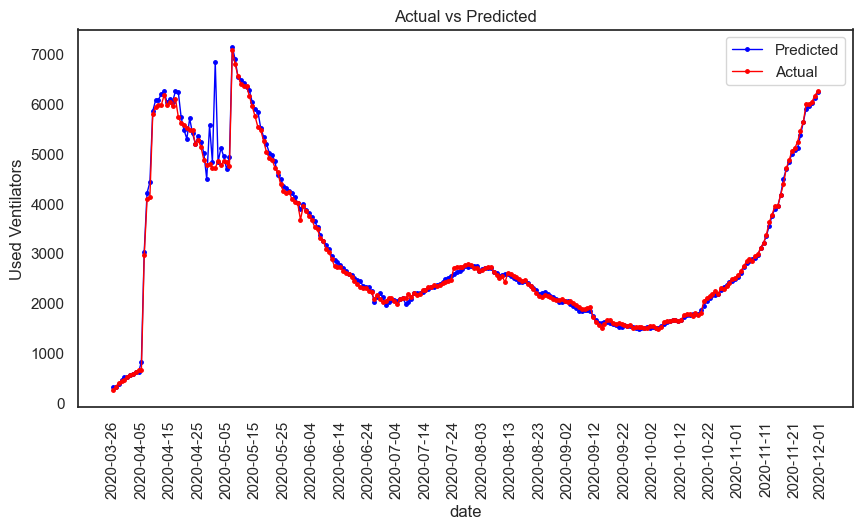

In [124]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data_Offset.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data_Offset.index, df_Covid_data_Offset['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

### Saving the model

In [129]:
# Save the model
# model.save("BEST_On_Ventilator_ANN_"+today.strftime("%Y-%m-%d")+".h5")

In [73]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("BEST_On_Ventilator_ANN_2020-12-10.h5")

### Load and prepare the data that we will make the future predictions on


In [75]:
# Loads the last saved data. Make sure the data is up to date by running the cell above. 
Prediction_data = pd.read_csv('df_Covid_data_Offset_prediction2020-12-10.csv')
Prediction_data = Prediction_data.set_index("date").dropna()
Prediction_data

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10,hospitalizedCurrently_shifted_1,hospitalizedCurrently_shifted_3,hospitalizedCurrently_shifted_7,hospitalizedCurrently_shifted_10,recovered_shifted_1,recovered_shifted_3,recovered_shifted_7,recovered_shifted_10
date,,,,,,,,,,,,,,,,,,
3/25/2020,1949,5140.0,75242,12891,146.0,167.0,92976.0,131826.0,224040.0,316808.0,7805.0,12409.0,20906.0,30268.0,97.0,3145.0,7084.0,12844.0
3/26/2020,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0,10978.0,14055.0,22997.0,32180.0,2418.0,4076.0,8586.0,14589.0
3/27/2020,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0,12409.0,15917.0,25777.0,36159.0,3145.0,4560.0,10861.0,16557.0
3/28/2020,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0,14055.0,18155.0,30268.0,43849.0,4076.0,5666.0,12844.0,18481.0
3/29/2020,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0,15917.0,20906.0,32180.0,45515.0,4560.0,7084.0,14589.0,21132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/11/2020,5578,111728.0,15576982,227354,6147116.0,0.0,15733399.0,16164569.0,16976003.0,17778197.0,112377.0,113864.0,124486.0,128201.0,6192058.0,6386712.0,6765103.0,7088000.0
12/12/2020,5610,112377.0,15733399,156417,6192058.0,0.0,15973253.0,16332015.0,17236260.0,17998336.0,111615.0,115843.0,125023.0,130429.0,6288834.0,6438448.0,6869195.0,7149595.0
12/13/2020,5572,111615.0,15973253,239854,6288834.0,0.0,16164569.0,16514745.0,17514627.0,18221436.0,113864.0,119308.0,125669.0,134330.0,6386712.0,6542039.0,6953561.0,7263930.0


In [76]:
X_predict = Prediction_data[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered',"positive_shifted_1", "positive_shifted_3","positive_shifted_7","positive_shifted_10",\
                  "hospitalizedCurrently_shifted_1","hospitalizedCurrently_shifted_3","hospitalizedCurrently_shifted_7","hospitalizedCurrently_shifted_10",\
                  "recovered_shifted_1", "recovered_shifted_3","recovered_shifted_7","recovered_shifted_10"]]
y_predict = Prediction_data['onVentilatorCurrently'].values.reshape(-1,1)

In [126]:
X_predict_scaled = X_scaler.transform(X_predict)
predictions = model.predict(X_predict_scaled)
print(f"True output:{y_predict[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(0)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(0)-y_predict[0]}") 

True output:[167.]
Predicted output:[513.]
Prediction Error:[346.]


In [78]:
X_predict_scaled

array([[-0.09436981, -2.50916542, -1.33517969, ..., -1.18660325,
        -1.1934165 , -1.19740924],
       [ 0.22987502, -2.33909538, -1.33004929, ..., -1.1859697 ,
        -1.19243627, -1.19630538],
       [ 0.2874913 , -2.13660674, -1.32448205, ..., -1.18564034,
        -1.19095156, -1.19506046],
       ...,
       [ 2.12630884,  4.28565899,  3.26407444, ...,  3.26310027,
         3.33999278,  3.38948486],
       [ 2.19495803,  4.42918151,  3.31942168, ...,  3.33224634,
         3.42773035,  3.44894867],
       [ 2.25563901,  4.55547367,  3.36786338, ...,  3.41489485,
         3.46792848,  3.53047309]])

In [127]:
predicted_y = y_scaler.inverse_transform(predictions).round(0)
predicted_y

array([[ 513.],
       [ 342.],
       [ 359.],
       [ 420.],
       [ 493.],
       [ 541.],
       [ 511.],
       [ 525.],
       [ 553.],
       [ 578.],
       [ 562.],
       [ 864.],
       [2848.],
       [3983.],
       [4147.],
       [5554.],
       [5720.],
       [5778.],
       [5874.],
       [5959.],
       [5686.],
       [5756.],
       [5703.],
       [5914.],
       [5895.],
       [5531.],
       [5276.],
       [5202.],
       [5516.],
       [5323.],
       [5017.],
       [5143.],
       [5014.],
       [4789.],
       [4235.],
       [5500.],
       [4642.],
       [6451.],
       [4551.],
       [4569.],
       [4400.],
       [4152.],
       [4431.],
       [6770.],
       [6541.],
       [5933.],
       [6032.],
       [6017.],
       [5812.],
       [5972.],
       [6072.],
       [5779.],
       [5738.],
       [5396.],
       [5219.],
       [5089.],
       [4920.],
       [4915.],
       [4682.],
       [4470.],
       [4387.],
       [4254.],
       [

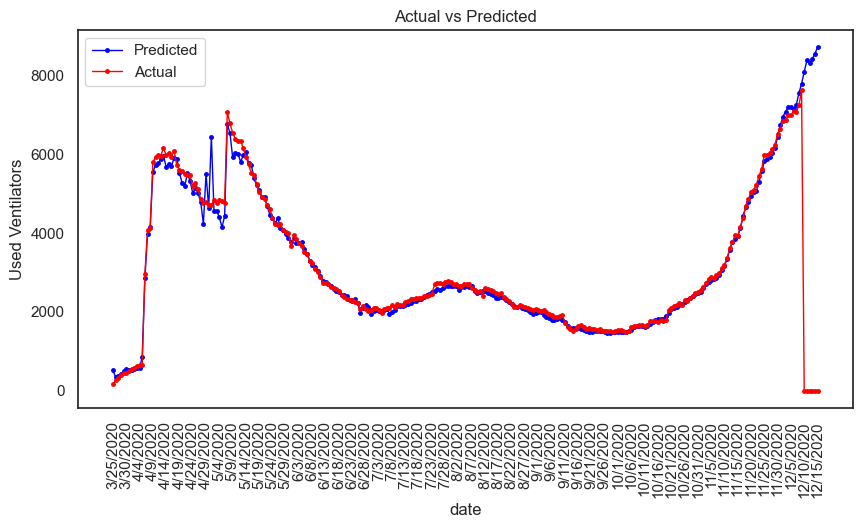

In [128]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(Prediction_data.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(Prediction_data.index, Prediction_data['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(Prediction_data.index[::5], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

In [81]:
# def prediction_plot(testY, test_predict):
#       len_prediction=[x for x in range(len(testY))]
#       plt.figure(figsize=(8,4))
#       plt.plot(len_prediction, testY[:l], marker='.', label="actual")
#       plt.plot(len_prediction, test_predict[:l], 'r', label="prediction")
#       plt.tight_layout()
#       sns.despine(top=True)
#       plt.subplots_adjust(left=0.07)
#       plt.ylabel('Ads Daily Spend', size=15)
#       plt.xlabel('Time step', size=15)
#       plt.legend(fontsize=15)
#       plt.show();

In [85]:
pip install plotly==4.14.1

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=a9a6c31ef3276c05d066e19bd2e856eb0a26b88dd960178d4dda6d5ebba25903
  Stored in directory: c:\users\stoja\appdata\local\pip\cache\wheels\ac\cb\8a\b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [86]:
  
from datetime import timedelta

import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [205]:
fig4 = go.Figure()
colour = "rgb(204, 152, 237)"

In [206]:
predicted_y_list = predicted_y.reshape(1,-1).tolist()[0]


In [207]:
fig4.add_trace(go.Scatter(x=Prediction_data.index.values,
                         y=predicted_y_list,
                         mode="lines",
                         name='Prediction',
                         line=dict(color=colour,
                                   width=2,
                                   dash=None)))

In [208]:
# Prediction_data.index.values

In [209]:
fig4.add_trace(go.Scatter(x = Prediction_data.index.values,
                         y =df_Covid_data_Offset['onVentilatorCurrently'],
                         name='True venitlators used',
                         mode='lines',
                         line=dict(color='darkred',
                                   width=2,
                                   dash='solid')))

In [210]:
fig4.update_layout(title={'text': '<b>Ventilators Used/Prediction</b>',
                         'y': 0.9,
                         'x': 0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'
                         },
                  font=dict(size=16, color="black")
                  )

In [211]:
annotations = []

fig4.update_xaxes(title_text="Date",
                 tickfont=dict(size=14),
                 titlefont=dict(size=16))

fig4.update_yaxes(title_text="On Ventilator",
                 tickfont=dict(size=12),
                 titlefont=dict(size=14))

fig4.update_layout(template='plotly_white')

fig4.update_layout(xaxis=dict(tickformat="%m-%d"))
fig4.update_xaxes(range=['2020-04-30', df_Covid_data_Offset.index.values[-1]])

fig4.update_layout(annotations=annotations)

fig4.update_layout(hovermode="x")
fig4.update_layout(showlegend=False)

fig4.update_layout(
    autosize=True,
    height=400,
    margin=dict(l=0, r=0)
)

In [212]:
fig4.add_shape(
    dict(
        type="line",
        x0=250,
        y0=0,
        x1=250,
        y1=8500,
        line=dict(
            color='rgb(65, 65, 69)',
            width=3
        )
    ))

fig4.show()

In [213]:
today

Timestamp('2020-12-11 21:47:28.220853')

In [229]:
fig5 = go.Figure()
colour = "rgb(204, 152, 237)"

fig5.add_trace(go.Scatter(x=Prediction_data.index.values,
                         y=predicted_y_list,
                         mode=None,
                         name='Prediction',
                         line=dict(color=colour,
                                   width=2,
                                   dash="dot")))

fig5.add_trace(go.Scatter(x = Prediction_data.index.values,
                         y =df_Covid_data_Offset['onVentilatorCurrently'],
                         name='True venitlators used',
                         mode='lines',
                         line=dict(color='darkred',
                                   width=2,
                                   dash='solid')))

fig5.update_layout(title={'text': '<b>Ventilators Used/Prediction</b>',
                         'y': 0.9,
                         'x': 0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'
                         },
                  font=dict(size=16, color="black")
                  )

annotations = []

fig5.update_xaxes(title_text="Date",
                 tickfont=dict(size=12),
                 titlefont=dict(size=16))

fig5.update_yaxes(title_text="On Ventilator",
                 tickfont=dict(size=12),
                 titlefont=dict(size=16))

fig5.update_layout(template='plotly_white')

fig5.update_layout(xaxis=dict(tickformat="%m-%d"))
fig5.update_xaxes(range=['2020-04-30', df_Covid_data_Offset.index.values[-1]])

fig5.update_layout(annotations=annotations)

fig5.update_layout(hovermode="x")
fig5.update_layout(showlegend=False)

fig5.update_layout(
    autosize=True,
    height=600,
    margin=dict(l=0, r=0)
)

fig5.add_shape(
    dict(
        type="line",
        x0=250,
        y0=0,
        x1=250,
        y1=9000,
        line=dict(
            color='rgb(65, 65, 69)',
            width=2
        )
    ))

fig5.show()

In [230]:
pio.write_html(fig5,
               file='fist_plot_SM.html',
               config={'displayModeBar': False},
               auto_open=True,
               include_plotlyjs='cdn',
               full_html=False)

In [231]:
df_Covid_data_Offset['onVentilatorCurrently']

date
2020-03-26     258.0
2020-03-27     324.0
2020-03-28     390.0
2020-03-29     439.0
2020-03-30     451.0
               ...  
2020-11-27    6030.0
2020-11-28    6148.0
2020-11-29    6245.0
2020-11-30    6520.0
2020-12-01    6649.0
Name: onVentilatorCurrently, Length: 251, dtype: float64

In [232]:
# NOTE TO ALL, THE DATA IS 10 DAYS BEHING. AFTER WE ADD 10 MORE DAYS IN THE PROJECTION THE DATE WILL BE CURRENT